


IOR method is to remove outliers from the data when distribution is skewed


In the following dataset we can Placement_exam_marks column who's distribution is skewed 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

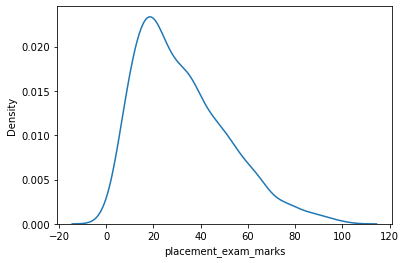

In [5]:
sns.distplot(df['placement_exam_marks'],hist=False)

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

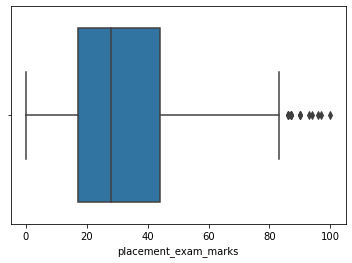

In [6]:
sns.boxplot(df['placement_exam_marks'])

IOR=percentile75 - percentile25

upperlimit=percentile75+1.5*IOR

lowerlimit=percentile25-1.5*IOR

In [7]:
percentile75=df['placement_exam_marks'].quantile(0.75)

percentile25=df['placement_exam_marks'].quantile(0.25)

In [8]:
IOR= percentile75 - percentile25

In [9]:
upperlimit= percentile75 + 1.5 * IOR
lowerlimit= percentile25 - 1.5 * IOR

In [11]:
print(upperlimit  ,  lowerlimit)

84.5 -23.5


In [12]:
# Caping

df['placement_exam_marks']=np.where(
    df['placement_exam_marks']>upperlimit,
    upperlimit,
    np.where(
        df['placement_exam_marks']<lowerlimit,
        lowerlimit,
        df['placement_exam_marks']
    )
)

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

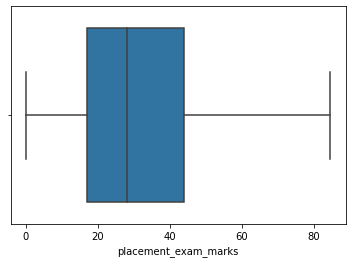

In [13]:
sns.boxplot(df['placement_exam_marks'])

we have successfully removed outliers from the place_exam_marks using IQR method